<a href="https://colab.research.google.com/github/junghc801/AstroData/blob/main/Astro1221_RotationCurve_MilkyWay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import astropy.constants as const
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [60]:
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (2).txt


In [61]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

In [62]:
'''
Calcualte the orbital velocity
@param: mass, radius
@return: orbital velocity
'''
def orbital_velocity(mass, radius):
  G = const.G
  v = np.sqrt(G * mass / radius)
  # velocity = np.sqrt(ac.G * mass / radius)
  return v

In [63]:
mass_bulge =  1e10* u.solMass        # Note the scientific notation here to define bulge mass
radius_bulge = np.arange(1, 30) * u.kpc  # Define a range of orbital radius in kilo parsec
velocity_bulge = orbital_velocity(mass_bulge, radius_bulge)
print(velocity_bulge.to(u.km/u.s))

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


In [64]:
radius_array = np.arange(1, 30) * u.kpc # Define a range of orbital radius in kilo parsec
velocity_array = orbital_velocity(mass_bulge, radius_array)
print(velocity_array.to(u.km/u.s)) # When in doubt, print them out!

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


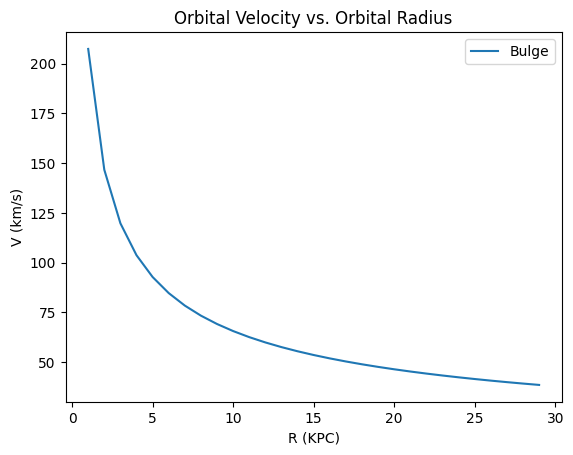

In [65]:
plt.plot(radius_bulge.to(u.kpc), velocity_bulge.to(u.km/u.s), label="Bulge")
plt.xlabel('R (KPC)')
plt.ylabel('V (km/s)')
plt.title('Orbital Velocity vs. Orbital Radius')
plt.legend()
plt.show()

In [77]:
mass_disk = 1.5e11 * u.solMass # Define disk total mass
radius_disk = 10 * u.kpc # Define the outer edge of disk radius
density_disk = mass_disk / (np.pi * (radius_disk**2)) # here the density is in the unit of solar mass per square kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2))

477.464829275686 1e+06 solMass / kpc2


In [67]:
'''
Calculate the enclosed mass for a halo component
@param radius
          orbital radius
        density
          density of the disk
@return mass
          enclosed mass
'''
def enclosedMassForDisk (radius, density=density_disk):
   if radius < 10 * u.kpc:
        mass = np.pi * (radius**2) * density
   else:
        radius = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        mass = np.pi * (radius**2) * density
   return mass

In [68]:
print(enclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(enclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

1300.0000000000002 1e+06 solMass at 1 kpc
32500.000000000004 1e+06 solMass at 5 kpc


In [69]:
def enclosedMassForBulge_Disk(radius, density_disk=318 * 1e6 * u.solMass/u.kpc**2, mass_bulge = 1e10 * u.solMass):
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    mass_disk = enclosedMassForDisk(radius, density=density_disk)
    mass_total = mass_bulge + mass_disk
    return(mass_total)


In [70]:
# Define arrays to be calculated
radius_array = np.arange(1, 30) * u.kpc
mass_disk = np.zeros(len(radius_array)) * u.solMass # Don't forget unit here
mass_bulge_disk = np.zeros(len(radius_array)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(radius_array)):
    mass_disk[i] = enclosedMassForDisk(radius_array[i])
    mass_bulge_disk[i] = enclosedMassForBulge_Disk(radius_array[i])

# Calculating the resulting orbital velocity due to each component
velocity_disk_array = orbital_velocity(mass_disk, radius_array)
velocity_bulge_disk_array = orbital_velocity(mass_bulge_disk, radius_array)

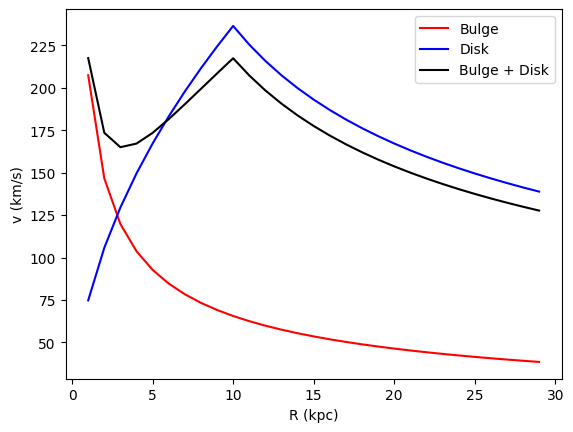

In [71]:
# Plot them all
plt.plot(radius_array.to(u.kpc), velocity_array.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(radius_array.to(u.kpc), velocity_disk_array.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(radius_array.to(u.kpc), velocity_bulge_disk_array.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [72]:
'''
Calculate the enclosed mass for the whole component
@param radius
          orbital radius
        density_disk
          density of the disk
        density_halo
          density of the halo
        mass_bulge
          mass of the bulge
@return mass
          enclosed mass
'''
def enclosedMassForTotalMilkyWay(radius, density_disk, density_halo,  mass_bulge = 1e10 * u.solMass):
    mass_disk = enclosedMassForDisk(radius, density_disk)
    mass_halo = enclosedMassForHalo(radius, density_halo)
    mass_total = mass_bulge + mass_disk+ mass_halo
    return(mass_total)

In [73]:
mass_halo = (3e11) * u.solMass # Define halo total mass
radius_halo = 35 * u.kpc # Define the halo radius
density_halo = mass_halo / (4 / 3 * np.pi * (radius_halo**3)) # here the density is in the unit of solar mass per cubic kpc
print(density_halo.to(1e6 * u.solMass/u.kpc**3))

1.6704308895942368 1e+06 solMass / kpc3


In [74]:
'''
Calculate the enclosed mass for a halo component
@param radius
          orbital radius
        density
          density of the halo
@return mass
          enclosed mass
'''
def enclosedMassForHalo (radius, density):
   if radius < 35 * u.kpc:
        mass = (4 / 3 * np.pi * (radius**3)) * density
   else:
        radius = 35 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        mass = (4 / 3 * np.pi * (radius**3)) * density
   return mass

In [78]:
# Define arrays to be calculated
radius_array = np.arange(5, 35) * u.kpc
mass_bulge = np.zeros(len(radius_array)) * u.solMass
mass_disk = np.zeros(len(radius_array)) * u.solMass
mass_halo = np.zeros(len(radius_array)) * u.solMass
mass_total = np.zeros(len(radius_array)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(radius_array)):
    mass_bulge[i] = 1e10 * u.solMass
    mass_disk[i] = enclosedMassForDisk(radius_array[i], density_disk)
    mass_halo[i] = enclosedMassForHalo(radius_array[i], density_halo)
    mass_total[i] = enclosedMassForTotalMilkyWay(radius_array[i], density_disk, density_halo)

# Calculating the resulting orbital velocity due to each component
# velocity_bulge_array = orbital_velocity(mass_bulge, radius_array)
velocity_bulge_array = orbital_velocity(mass_bulge, radius_array)
velocity_disk_array = orbital_velocity(mass_disk, radius_array)
velocity_halo_array = orbital_velocity(mass_halo, radius_array)
velocity_total_array = orbital_velocity(mass_total, radius_array)

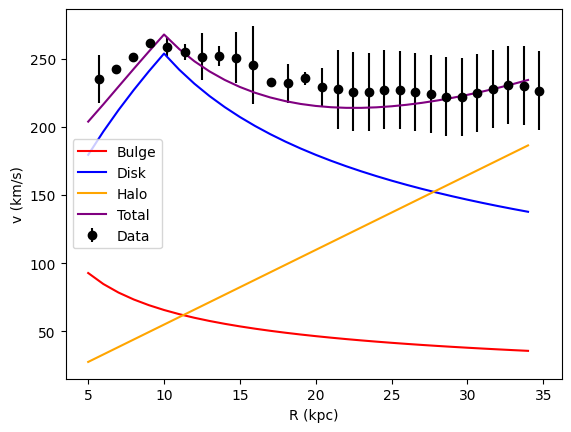

In [79]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

plt.plot(radius_array.to(u.kpc), velocity_bulge_array.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(radius_array.to(u.kpc), velocity_disk_array.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(radius_array.to(u.kpc), velocity_halo_array.to(u.km/u.s), color="orange", label="Halo")
plt.plot(radius_array.to(u.kpc), velocity_total_array.to(u.km/u.s), color="purple", label="Total")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

